In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv("student_performance.csv", index_col="student_id")

# EDA

In [3]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, S1000 to S1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   i

## Distributions

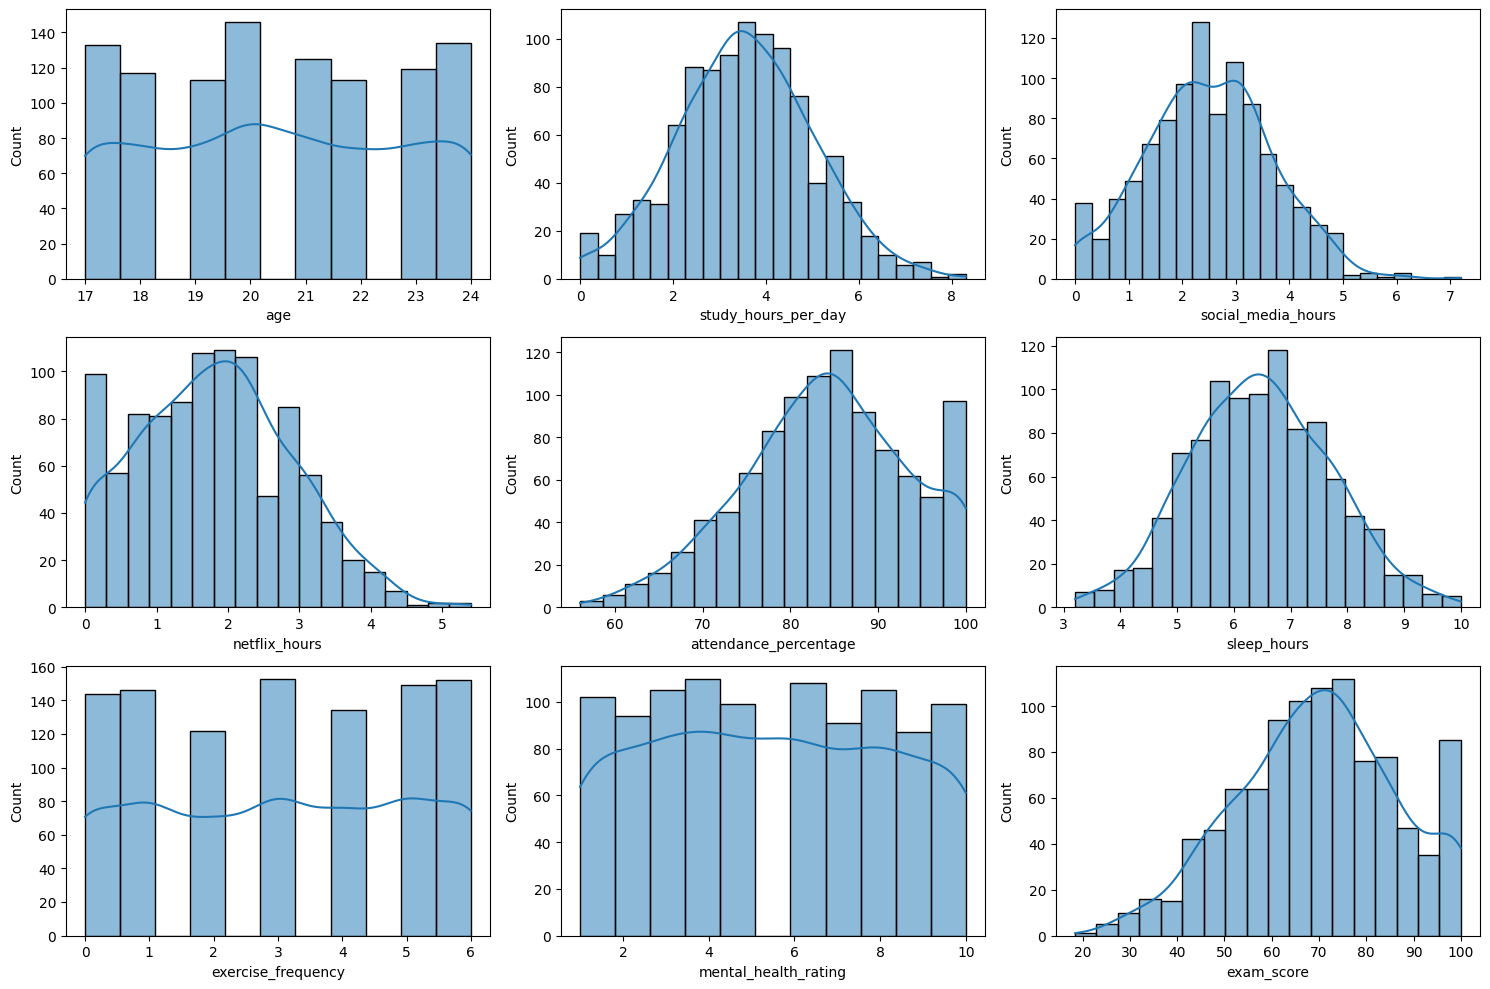

In [5]:
num_col = df.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_col, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)

plt.tight_layout()
plt.show()

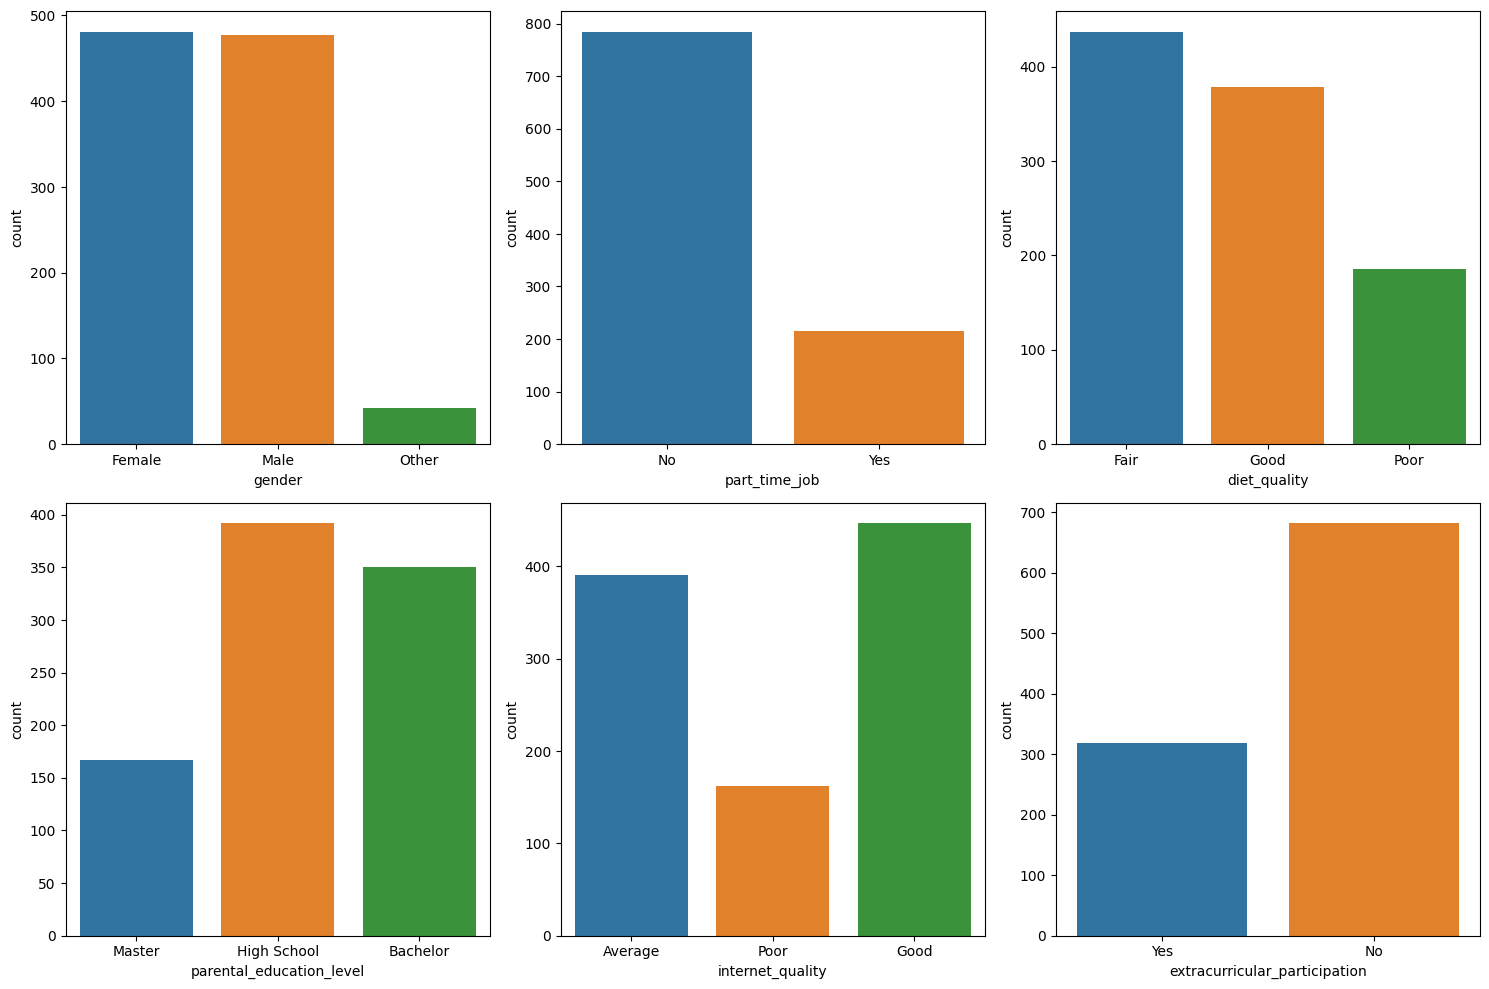

In [6]:
cat_col = df.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_col, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    

plt.tight_layout()
plt.show()

## Relationships

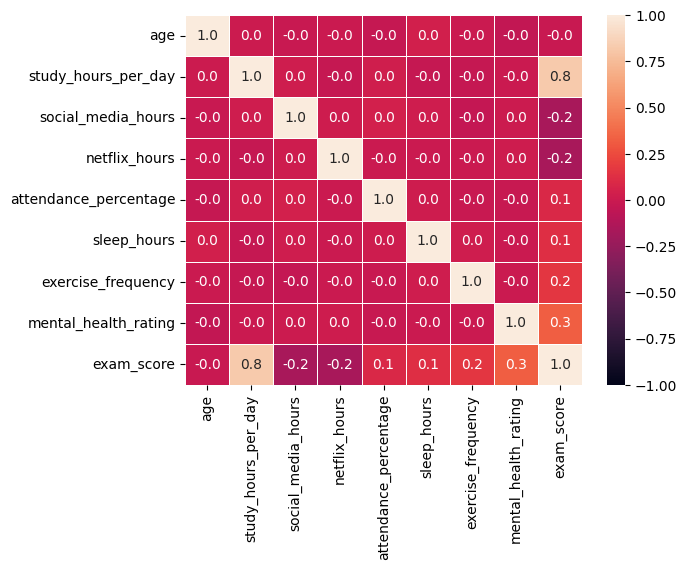

In [7]:
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".1f", linewidth=.5)
plt.show()

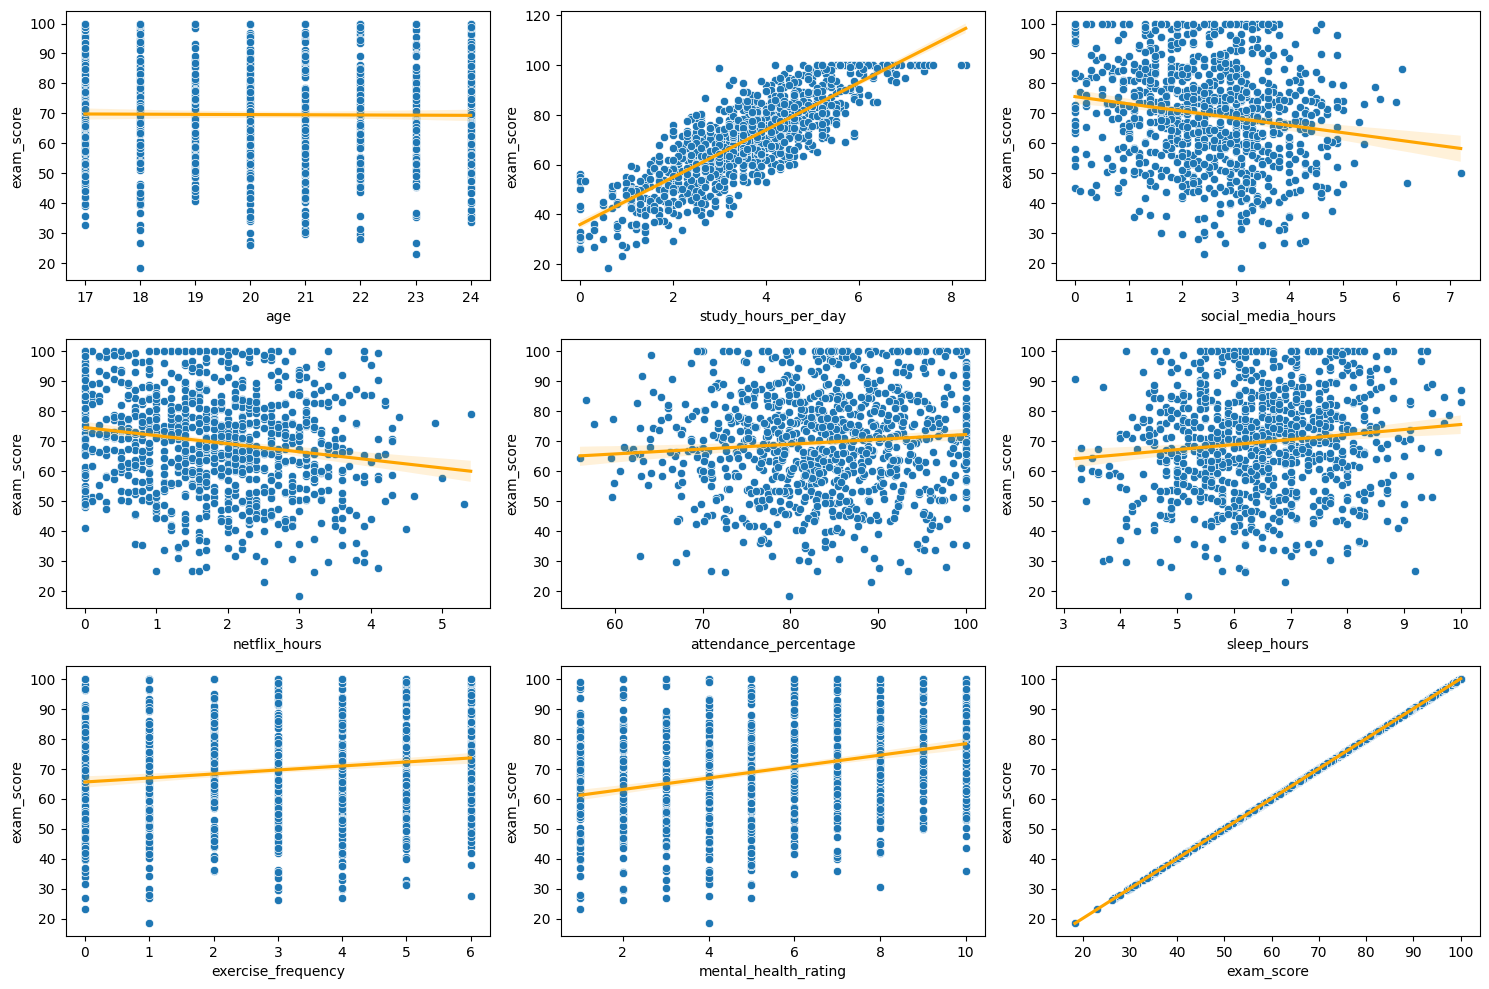

In [8]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_col, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=col, y='exam_score', data=df)
    sns.regplot(x=col, y='exam_score', data=df, scatter=False, color='orange')
    

plt.tight_layout()
plt.show()

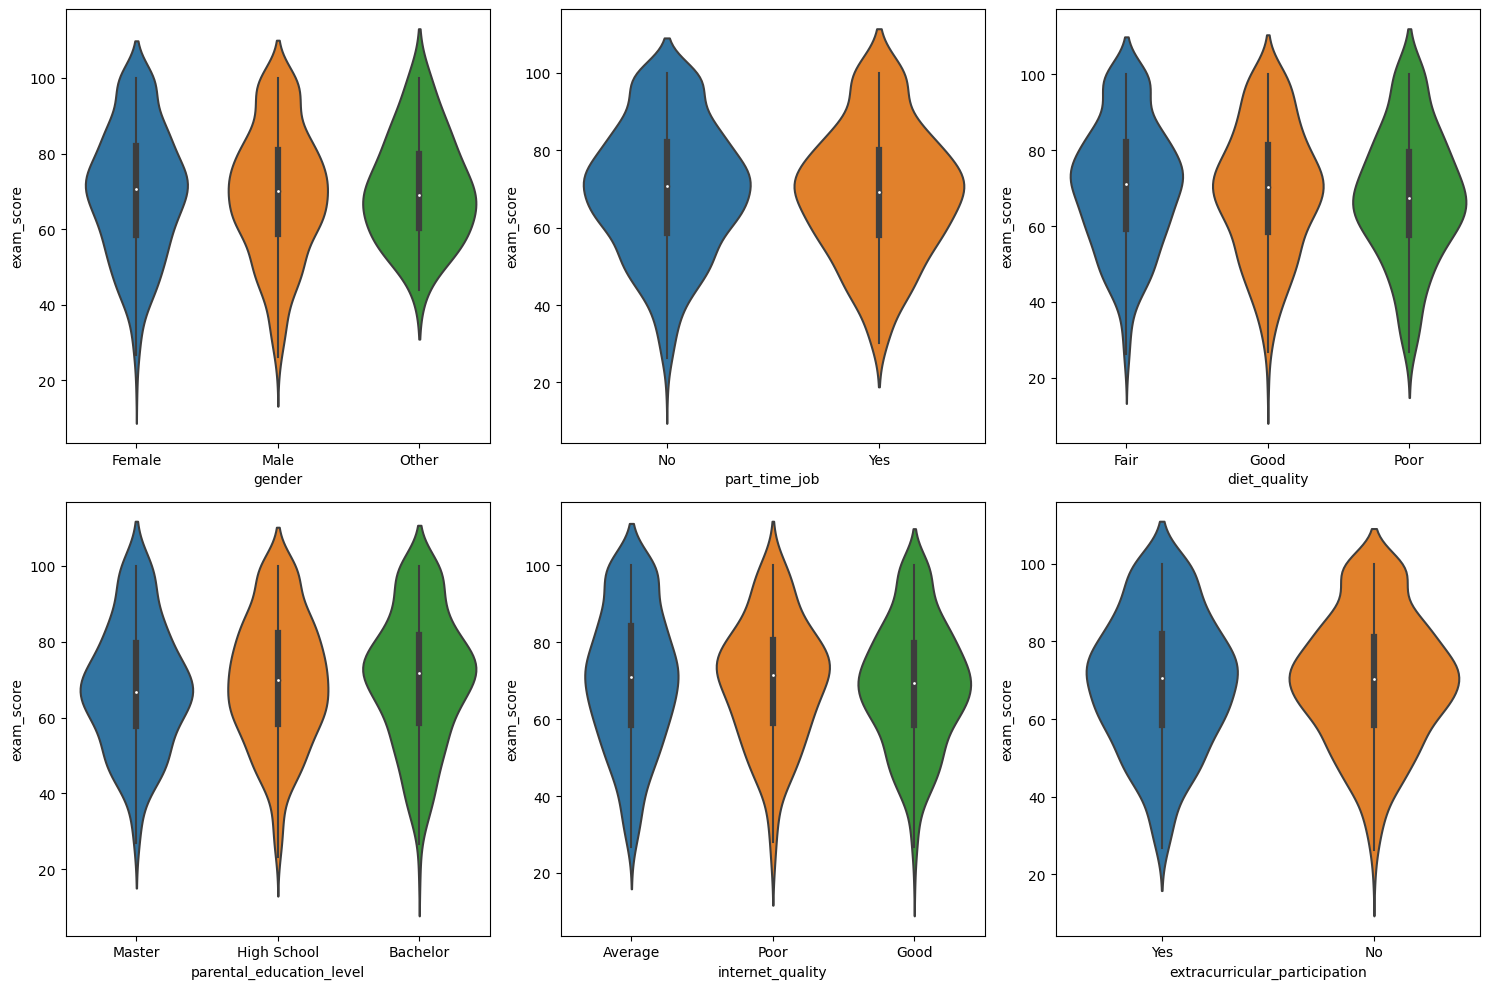

In [9]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_col, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=col, y='exam_score', data=df)
    
plt.tight_layout()
plt.show()

## Are There Missing Values?

In [10]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nMissing rate in 'parental_education_level':")
print(f"{df['parental_education_level'].isnull().mean():.2%}")

print("\nUnique values in 'parental_education_level':")
print(df["parental_education_level"].unique())

print("\nValue counts in 'parental_education_level':")
print(df["parental_education_level"].value_counts())

Missing values per column:
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Missing rate in 'parental_education_level':
9.10%

Unique values in 'parental_education_level':
['Master' 'High School' 'Bachelor' nan]

Value counts in 'parental_education_level':
parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64


In [11]:
nan_df = df[df['parental_education_level'].isnull()]
no_df = df.dropna()

no_df_copy = no_df.copy()
no_df_copy["group"] = "No Missing"

nan_df_copy = nan_df.copy()
nan_df_copy["group"] = "Missing"

combined = pd.concat([no_df_copy, nan_df_copy])

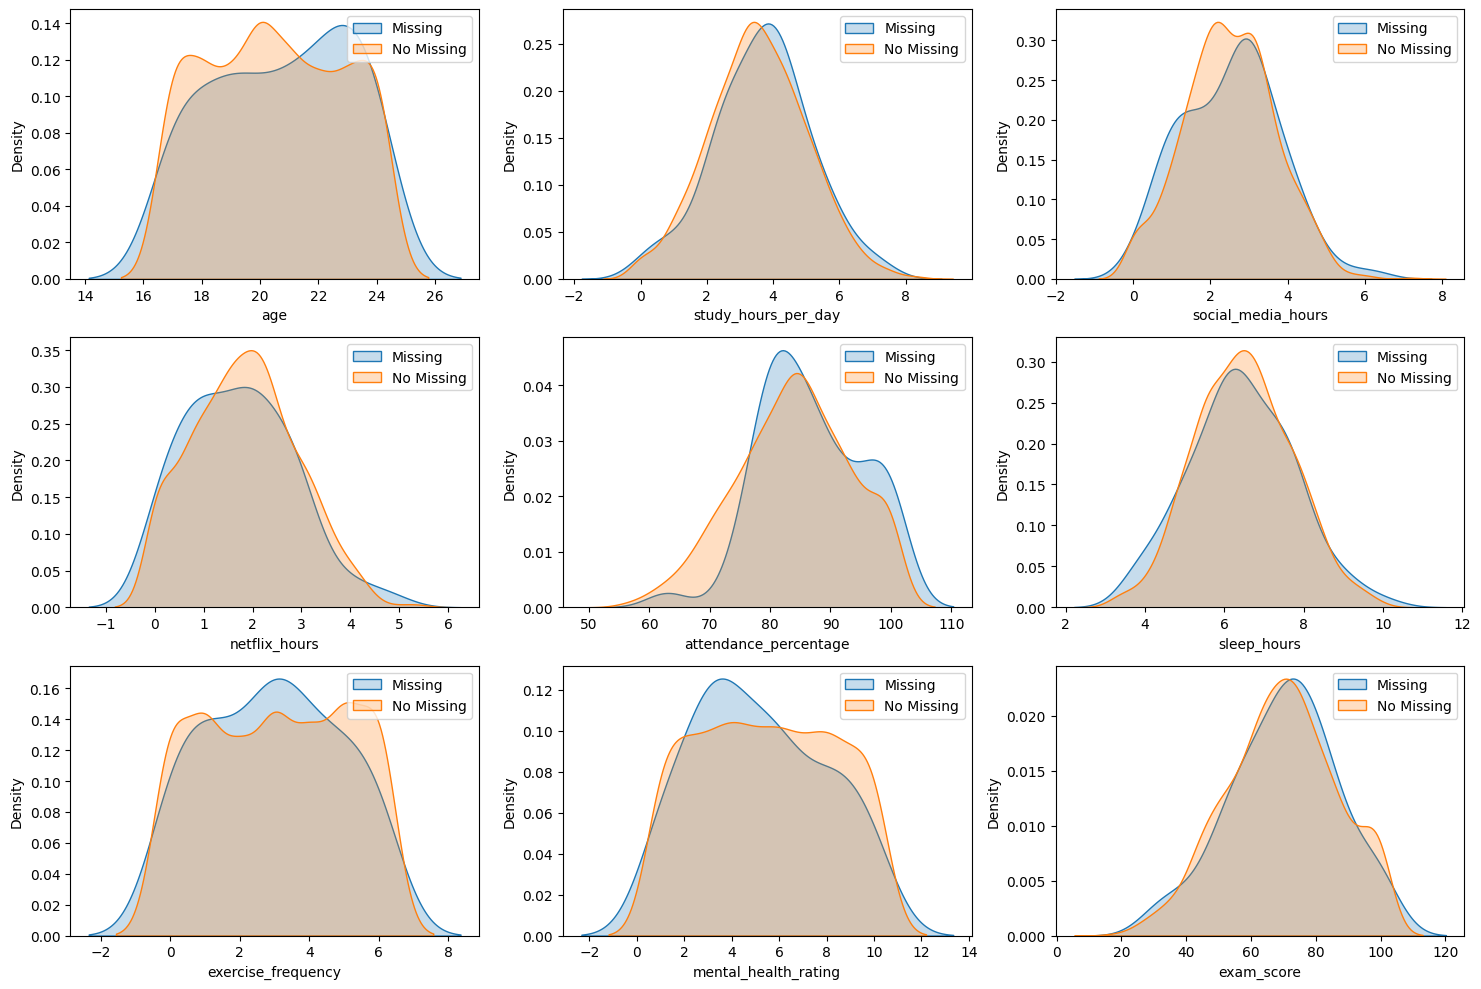

In [12]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_col, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=nan_df[col], shade=True, label='Missing')
    sns.kdeplot(data=no_df[col], shade=True, label='No Missing')
    plt.legend()

plt.tight_layout()
plt.show()

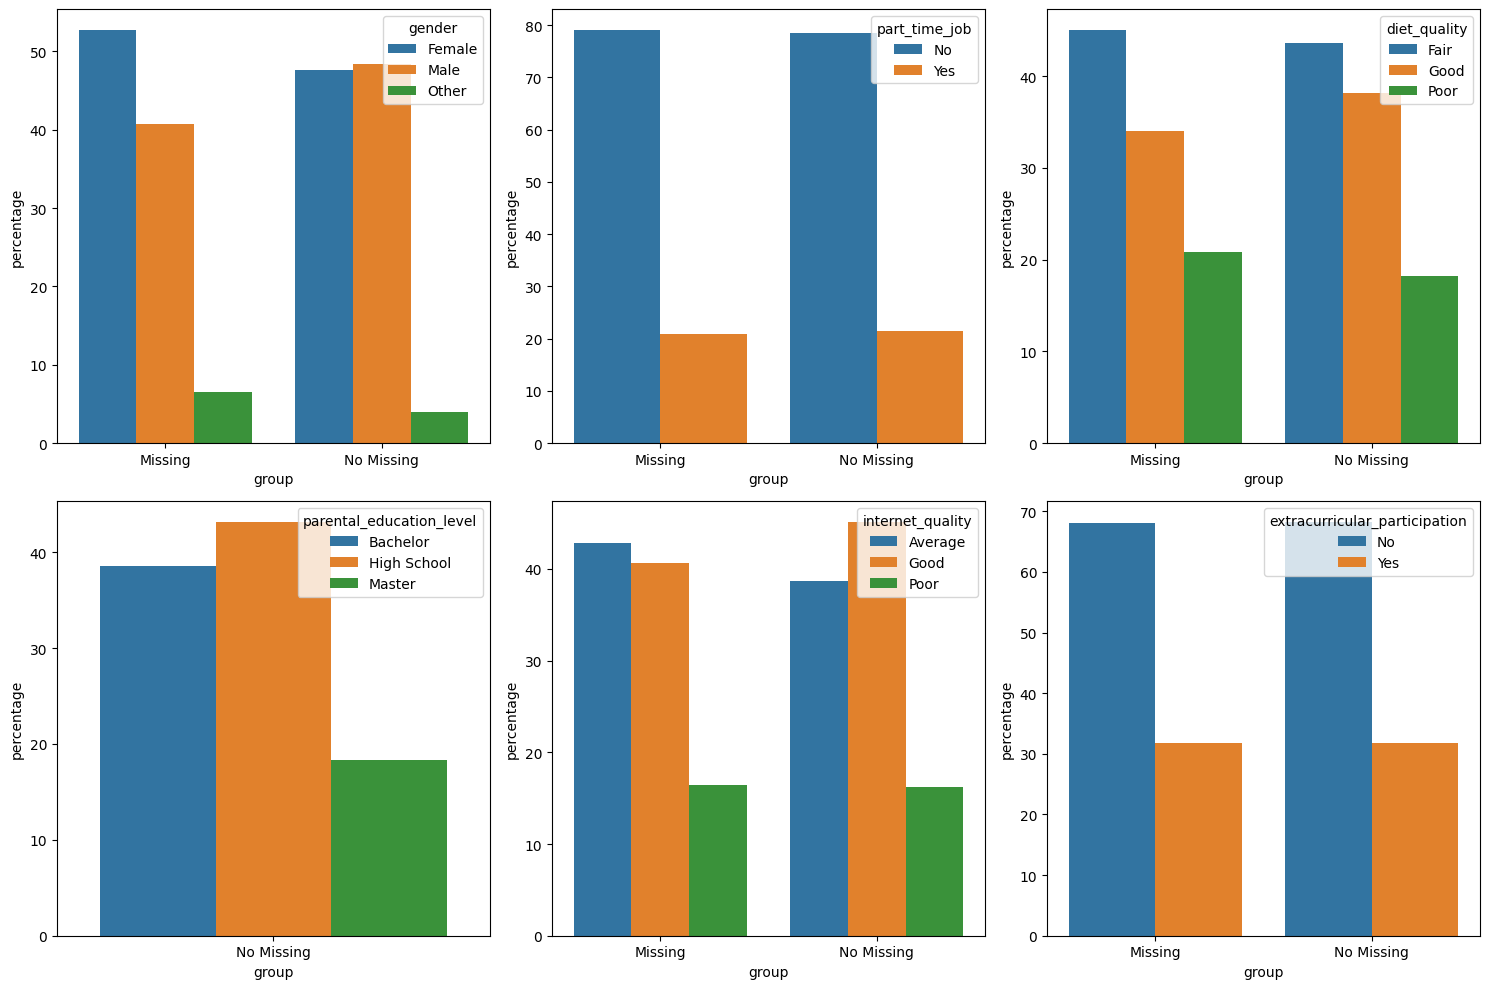

In [13]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_col, 1):
    counts = combined.groupby(['group', col]).size().reset_index(name='count')
    counts['percentage'] = counts.groupby('group')['count'].transform(lambda x: x / x.sum() * 100)
    
    plt.subplot(2, 3, i)
    sns.barplot(data=counts, x='group', y='percentage', hue=col)
    

plt.tight_layout()
plt.show()